<a href="https://colab.research.google.com/github/kaisardauletbek/NeuralNetwork/blob/main/LearningNeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [25]:
x1 = torch.rand([2000,3000])
x1

tensor([[0.2136, 0.5503, 0.1027,  ..., 0.4614, 0.5259, 0.2290],
        [0.2414, 0.3621, 0.1647,  ..., 0.1660, 0.9038, 0.3609],
        [0.7509, 0.7207, 0.5023,  ..., 0.1617, 0.7646, 0.5933],
        ...,
        [0.2988, 0.4473, 0.1487,  ..., 0.2923, 0.9143, 0.3631],
        [0.2552, 0.7136, 0.9730,  ..., 0.7845, 0.2397, 0.7032],
        [0.9131, 0.1064, 0.4080,  ..., 0.2794, 0.1445, 0.4345]])

In [26]:
torch.cuda.is_available()

True

In [27]:
torch.device("cuda:0")

device(type='cuda', index=0)

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
device

device(type='cuda', index=0)

In [30]:
x1_cuda = x1.to(device)
#x_cuda

In [32]:
%time y = (x1+x1*10.0)**2

CPU times: user 21.1 ms, sys: 23.6 ms, total: 44.7 ms
Wall time: 47.3 ms


In [31]:
%time y_cuda = (x1_cuda+x1_cuda*10.0)**2

CPU times: user 0 ns, sys: 2.68 ms, total: 2.68 ms
Wall time: 7.53 ms


**Going Further**

In [40]:
w = torch.tensor( [[1.,2.],[4.,5.]], requires_grad=True)
function = 10 * torch.log( ( w + 1. ) ).sum()
function.backward()
print(w-w.grad)

tensor([[-4.0000, -1.3333],
        [ 2.0000,  3.3333]], grad_fn=<SubBackward0>)


In [37]:
x = torch.tensor([[1.,  2.,  3.,  4.],
                  [5.,  6.,  7.,  8.],
                  [9., 10., 11., 12.]], requires_grad = True, device = device)

function = 10 * (x**2).sum()
function.backward()

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]], device='cuda:0') <- gradient


In [35]:
print(function.grad_fn)
print(function.grad_fn.next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [7]:
import torch
a = torch.tensor([8.,8.], requires_grad = True)
optimizer = torch.optim.SGD([a], lr=0.001)
var_history = []
fn_history = []


In [10]:
def function_parabola(variable):
  return 10*(variable ** 2).sum()

def make_gradient_step(function, variable):
  function_result = function(variable)
  function_result.backward()
  optimizer.step()
  optimizer.zero_grad()

for i in range(500):
  var_history.append(a.data.numpy().copy())
  fn_history.append(function_parabola(a).data.cpu().numpy().copy())
  make_gradient_step(function_parabola, a)

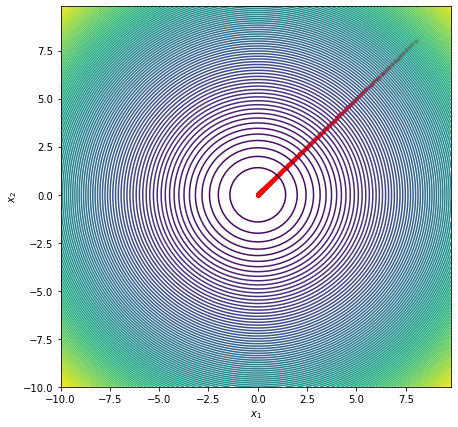

In [13]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

# New Section